# Previsão de preço de Ações

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
import tensorflow as tf

In [7]:
data = pd.read_csv("../../dados/PETR4.SA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-26,27.120001,27.219999,26.750000,26.750000,20.130795,40249400
1,2023-04-27,26.850000,27.180000,25.910000,26.100000,19.641634,115632700
2,2023-04-28,23.600000,24.049999,23.150000,23.700001,20.091066,81138500
3,2023-05-02,23.700001,23.740000,22.639999,22.740000,19.277252,67911100
4,2023-05-03,22.600000,22.990000,22.420000,22.660000,19.209431,51133700
...,...,...,...,...,...,...,...
246,2024-04-22,40.759998,41.590000,40.520000,41.500000,40.419792,51775500
247,2024-04-23,41.400002,41.630001,40.959999,41.419998,40.341873,35456900
248,2024-04-24,41.549999,41.990002,41.209999,41.230000,40.156818,45388300
249,2024-04-25,41.400002,42.480000,41.080002,42.220001,41.121052,66372400


In [8]:
data = data.iloc[::-1]
data

,Date,Open,High,Low,Close,Adj Close,Volume
250,2024-04-26,41.290001,41.779999,41.070000,41.520000,41.520000,23265900
249,2024-04-25,41.400002,42.480000,41.080002,42.220001,41.121052,66372400
248,2024-04-24,41.549999,41.990002,41.209999,41.230000,40.156818,45388300
247,2024-04-23,41.400002,41.630001,40.959999,41.419998,40.341873,35456900
246,2024-04-22,40.759998,41.590000,40.520000,41.500000,40.419792,51775500
...,...,...,...,...,...,...,...
4,2023-05-03,22.600000,22.990000,22.420000,22.660000,19.209431,51133700
3,2023-05-02,23.700001,23.740000,22.639999,22.740000,19.277252,67911100
2,2023-04-28,23.600000,24.049999,23.150000,23.700001,20.091066,81138500
1,2023-04-27,26.850000,27.180000,25.910000,26.100000,19.641634,115632700


In [9]:
length_data = len(data)
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)
train_data = data[:length_train].iloc[:,:2]
print("Train Data :", train_data)
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date']) 

Data length : 251
Train data length : 176
Validation data lenth : 75
Train Data :            Date       Open
250  2024-04-26  41.290001
249  2024-04-25  41.400002
248  2024-04-24  41.549999
247  2024-04-23  41.400002
246  2024-04-22  40.759998
..          ...        ...
79   2023-08-17  31.750000
78   2023-08-16  31.000000
77   2023-08-15  32.049999
76   2023-08-14  30.480000
75   2023-08-11  30.610001

[176 rows x 2 columns]


In [10]:
dataset_train = train_data["Open"]
dataset_train

250    41.290001
249    41.400002
248    41.549999
247    41.400002
246    40.759998
         ...    
79     31.750000
78     31.000000
77     32.049999
76     30.480000
75     30.610001
Name: Open, Length: 176, dtype: float64

In [11]:
dataset_train = np.expand_dims(dataset_train, axis=1)
dataset_train

array([[41.290001],
       [41.400002],
       [41.549999],
       [41.400002],
       [40.759998],
       [40.049999],
       [40.      ],
       [39.490002],
       [39.009998],
       [38.939999],
       [39.720001],
       [39.599998],
       [38.73    ],
       [38.900002],
       [38.029999],
       [37.900002],
       [38.470001],
       [38.700001],
       [37.82    ],
       [37.5     ],
       [36.5     ],
       [36.279999],
       [36.669998],
       [36.18    ],
       [35.900002],
       [36.849998],
       [36.23    ],
       [36.389999],
       [36.41    ],
       [36.299999],
       [36.740002],
       [36.900002],
       [36.349998],
       [35.669998],
       [35.900002],
       [40.639999],
       [40.200001],
       [40.099998],
       [40.27    ],
       [40.349998],
       [40.59    ],
       [42.52    ],
       [42.700001],
       [41.900002],
       [42.139999],
       [42.669998],
       [42.450001],
       [42.77    ],
       [42.759998],
       [42.09    ],


In [14]:
X_train = []
y_train = []
for i in range(time_step, length_train):
    X_train.append(dataset_train[i-time_step:i,0])
    y_train.append(dataset_train[i,0])

In [18]:
y_train

[41.009998,
 41.099998,
 42.139999,
 42.299999,
 41.52,
 41.450001,
 41.009998,
 41.580002,
 40.779999,
 40.23,
 40.169998,
 40.0,
 39.099998,
 38.259998,
 38.290001,
 37.84,
 37.5,
 37.810001,
 38.139999,
 37.970001,
 38.610001,
 37.990002,
 38.5,
 37.98,
 38.099998,
 38.669998,
 38.380001,
 38.869999,
 39.119999,
 37.799999,
 37.439999,
 37.23,
 37.32,
 36.860001,
 36.5,
 36.669998,
 36.369999,
 35.959999,
 35.75,
 35.279999,
 35.0,
 34.209999,
 34.549999,
 34.459999,
 33.709999,
 33.650002,
 34.549999,
 34.919998,
 35.439999,
 35.720001,
 35.459999,
 35.900002,
 35.169998,
 35.0,
 34.98,
 35.130001,
 34.900002,
 36.540001,
 36.77,
 35.830002,
 35.98,
 35.689999,
 34.68,
 34.66,
 34.5,
 34.599998,
 35.07,
 35.740002,
 35.790001,
 35.02,
 35.009998,
 35.580002,
 36.209999,
 35.849998,
 36.080002,
 35.650002,
 36.59,
 38.689999,
 38.360001,
 37.990002,
 36.700001,
 36.400002,
 35.790001,
 35.139999,
 34.900002,
 34.150002,
 32.599998,
 32.509998,
 33.599998,
 33.970001,
 34.549999,
 34

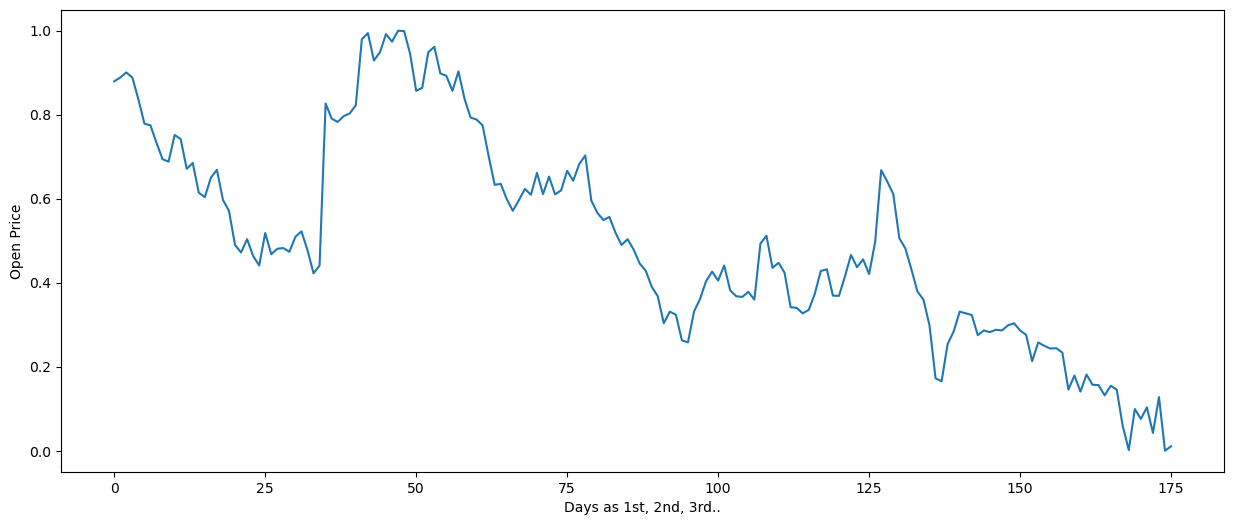

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
np.array(X_train).shape

(126, 50)

In [3]:
# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

D:\usr\anaconda312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.0000e+00 - loss: 0.5182
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0084 - loss: 0.4240  
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0084 - loss: 0.4549  
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 0.2839
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0053 - loss: 0.3349   
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0032 - loss: 0.3489   
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0032 - loss: 0.2596   
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0053 - loss: 0.2931  
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 0.3676
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0084 - loss: 0.2428  
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0032 - loss: 0.2267   
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - 

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step


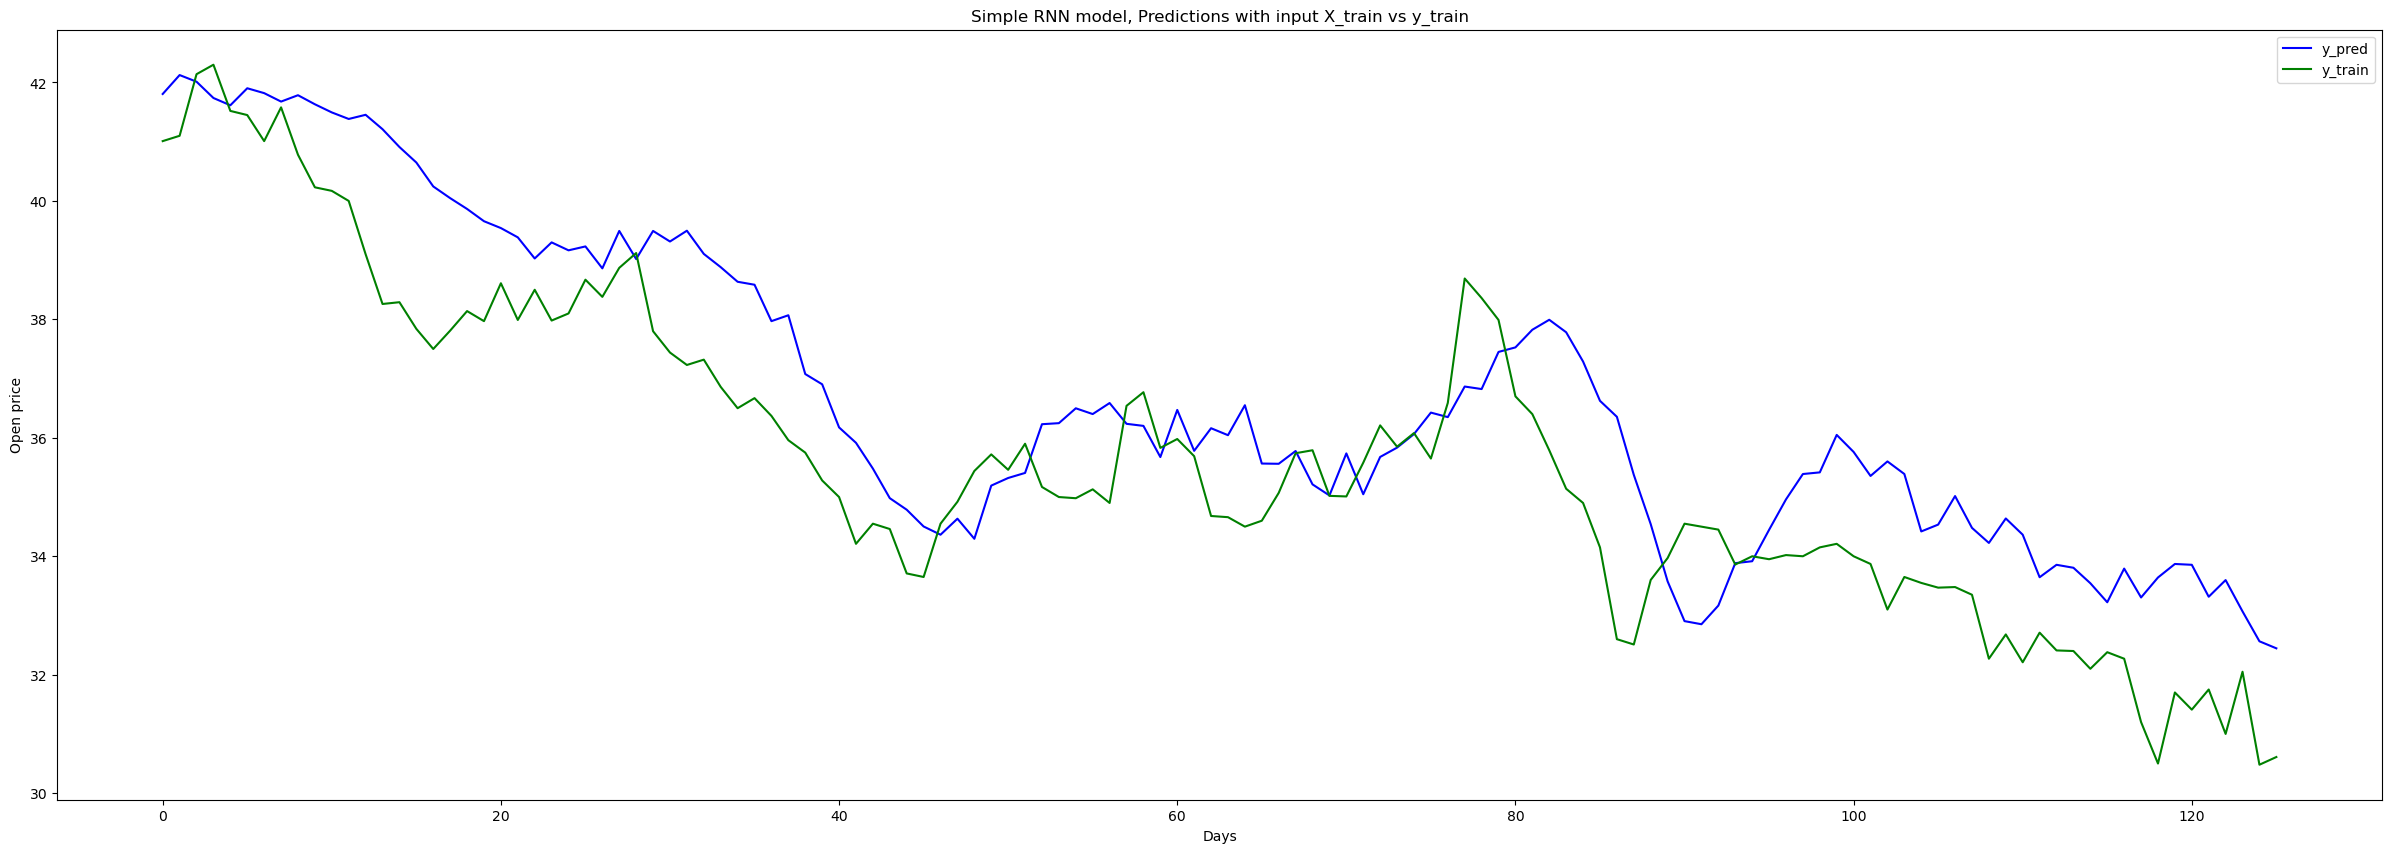

In [5]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))

plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [6]:
dataset_validation = validation_data["Open"].values # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))

y_pred_of_test = regressor.predict(X_test)

y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

Shape of scaled validation dataset : (75, 1)


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(scaler.inverse_transform(y_test), y_pred_of_test, squared=False)
def mean_absolute_percentage_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test), y_pred_of_test)